#### Sensor Network Simulation 
##### using the *Kalman Consensus Filter*

In [1]:
# Import modules
import os
import settings.input
import settings.initialize

# Reload local modules (for testing)
import imp
imp.reload(settings.input)
imp.reload(settings.initialize)

<module 'settings.initialize' from '/Users/shiraz/repos/sensor-network-sim/settings/initialize.py'>

In [2]:
# Get input files
simulation_file = os.path.join("settings","json_files", "simulation",  "ICF-sim.json")
sensor_network_file = os.path.join("settings","json_files", "sensor_network",  "ICF-sensor-network.json")

# Read input files
raw_data = settings.input.read_configs([simulation_file, sensor_network_file])
input_data  = settings.initialize.do_everything(raw_data)

In [3]:
import sim.target
import sim.network
import sim.history

# Reload local modules (for testing)
import imp
imp.reload(sim.target)
imp.reload(sim.network)
imp.reload(sim.history)

<module 'sim.history' from '/Users/shiraz/repos/sensor-network-sim/sim/history.py'>

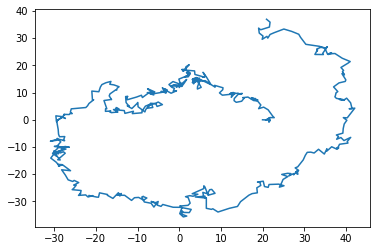

In [4]:
target = sim.target.create(input_data)
network = sim.network.create(input_data)

sim_history = sim.history.create(network)

for t in range(500):
    sim_history.add(target_x=target.x)
    network.make_measurements(target.x)
    
    # Do estimation here
    
    target.update()

sim_history.plot_xy(estimates=False)

In [5]:
# Probe values here
# target.x
# input_data

# for sensor in network.sensors.values():
#     print(sensor.neighbors)